In [3]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('data.csv')

In [5]:
df.head()

,Row ID,Year,Department Title,Payroll Department,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,...,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
0,111391,2014,Water And Power (DWP),NaN,1412316577,Commercial Service Representative,Full Time,NaN,$70386.48,$16129.89,...,NaN,98,1230,NaN,$16842.08,$1282.61,$0.00,$18124.69,DWP,http://per.lacity.org/perspecs/1230.pdf
1,31732,2013,Police (LAPD),4301.0,432728338,Police Officer I,Full Time,$25.12,$52450.56,$11331.00,...,POLICE OFFICERS UNIT,70,2214,A,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
2,27697,2013,Police (LAPD),4301.0,97182506,Police Officer II,Full Time,$42.77,$89303.76,$20036.32,...,POLICE OFFICERS UNIT,70,2214,2,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
3,14136,2013,Harbor (Port of LA),3201.0,950136941,Senior Security Officer,Full Time,$28.75,$60028.96,$15793.88,...,SUPV BLUE COLLAR,42,3184,0,$10710.24,$405.24,$11.40,$11126.88,City,http://per.lacity.org/perspecs/3184.pdf
4,91896,2014,Public Works - Sanitation,7024.0,3230003445,Senior Clerk Typist,Full Time,$30.92,$64553.13,$14700.00,...,CLERICAL UNIT,82,1368,0,$11000.40,$409.68,$11.40,$11421.48,City,http://per.lacity.org/perspecs/1368.pdf


In [6]:
df.shape

(285008, 35)

#  Hypothesis testing methods such as

Normal Distribution,
Student t Distribution,
ANOVA

In [8]:
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Data Cleansing

In [10]:
df = df[pd.notnull(df['Payroll Department'])]
df.rename(columns={'Projected Annual Salary' : 'Annual_sal'}, inplace = True)
df.rename(columns={'Job Class Title' : 'Job_title'}, inplace = True)
df.rename(columns={'Base Pay' : 'Base_Pay'}, inplace = True)

In [11]:
df.head()

,Row ID,Year,Department Title,Payroll Department,Record Number,Job_title,Employment Type,Hourly or Event Rate,Annual_sal,Q1 Payments,...,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
1,31732,2013,Police (LAPD),4301.0,432728338,Police Officer I,Full Time,$25.12,$52450.56,$11331.00,...,POLICE OFFICERS UNIT,70,2214,A,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
2,27697,2013,Police (LAPD),4301.0,97182506,Police Officer II,Full Time,$42.77,$89303.76,$20036.32,...,POLICE OFFICERS UNIT,70,2214,2,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
3,14136,2013,Harbor (Port of LA),3201.0,950136941,Senior Security Officer,Full Time,$28.75,$60028.96,$15793.88,...,SUPV BLUE COLLAR,42,3184,0,$10710.24,$405.24,$11.40,$11126.88,City,http://per.lacity.org/perspecs/3184.pdf
4,91896,2014,Public Works - Sanitation,7024.0,3230003445,Senior Clerk Typist,Full Time,$30.92,$64553.13,$14700.00,...,CLERICAL UNIT,82,1368,0,$11000.40,$409.68,$11.40,$11421.48,City,http://per.lacity.org/perspecs/1368.pdf
6,59695,2014,Airports (LAWA),101.0,4237826094,Custodian - Airports,Full Time,$22.95,$47911.51,$13493.87,...,SERVICE EMPLOYEES UNIT,4,3156,A,$11000.40,$409.68,$11.40,$11421.48,City,http://per.lacity.org/perspecs/3156.pdf


In [22]:
# removing $ sighn with sapce
for i in ['Annual_sal','Q1 Payments','Q2 Payments','Q3 Payments','Q4 Payments','Payments Over Base Pay',
          'Total Payments','Base_Pay','Permanent Bonus Pay','Longevity Bonus Pay','Temporary Bonus Pay','Overtime Pay',
          'Other Pay & Adjustments','Other Pay (Payroll Explorer)','Average Health Cost','Average Dental Cost',
          'Average Basic Life','Average Benefit Cost']:
    df[i] = df[i].str.replace('$','')

In [23]:
l=list(df.columns)

In [25]:
# outlier
df = df[df.Annual_sal != 0]  
df = df[df.Base_Pay != 0]
df.Annual_sal = df.Annual_sal.astype(float)
df.Base_Pay = df.Base_Pay.astype(float)

<Axes: xlabel='Annual_sal', ylabel='Density'>

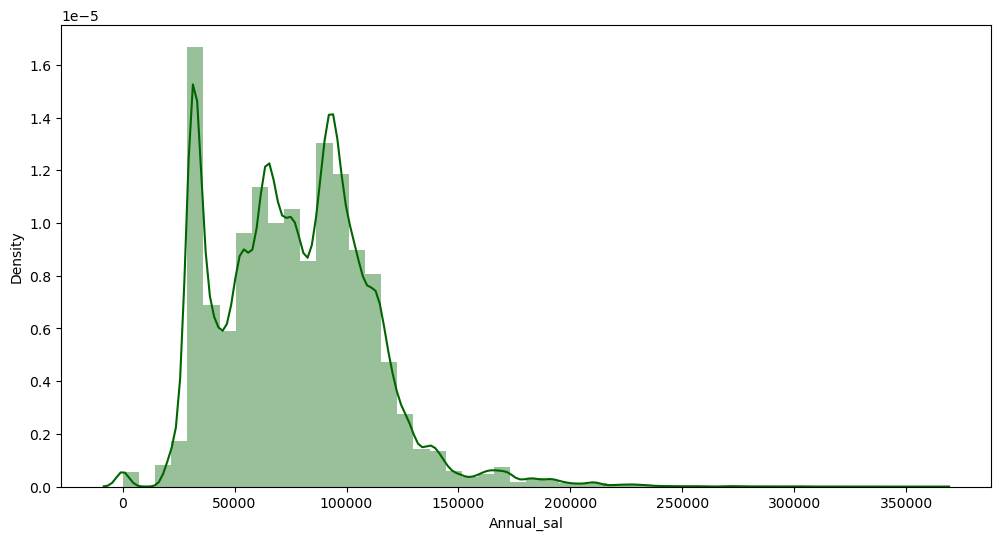

In [26]:
plt.figure(figsize = (12,6))
sns.distplot(df.Annual_sal,color = 'darkgreen')

In [28]:
#creating different saample from population
payroll_2015 = df[df.Year ==2015]
payroll_2016 = df[df.Year ==2016]

In [29]:
#Calculating the Population Parameters
pop_mean_2015 = payroll_2015['Annual_sal'].mean()
pop_std_2015 = statistics.stdev(payroll_2015.Annual_sal)
print("Population Mean: "+str(pop_mean_2015))
print("Population Standard Deviation: "+str(pop_std_2015))

Population Mean: 76046.39152504776
Population Standard Deviation: 34232.25489729045


In [30]:
#for sample parameter
print("Population Mean: "+str(payroll_2016['Annual_sal'].mean()))
payroll_2016_sample = payroll_2016.sample(frac=0.10)
sample_mean_2016 = payroll_2016_sample['Annual_sal'].mean()
print("Sample Mean: "+str(sample_mean_2016))
sample_std_2016 = statistics.stdev(payroll_2016_sample.Annual_sal)
print("Sample Standard Deviation: "+str(sample_std_2016))

Population Mean: 78711.19987224769
Sample Mean: 78819.38349837933
Sample Standard Deviation: 33039.18353492935


Normal distribution

Null Hypothesis : Pay does not increase in 2016
Alternate Hypothesis: It increases
Population parameters: Mean = pop_mean_2015, standard deviation = pop_std_2015
Sample parameters : Mean = sample_mean_2016, standard deviation = sample_std_2016

In [31]:
import math
# Confidence Level 95 %  for one sided Normal curve
zscore_critical = 1.65 
# Calculate the test statistics 
zscore_test_stat = ((sample_mean_2016 - pop_mean_2015)*math.sqrt(8916))/sample_std_2016
print(zscore_test_stat)

7.925092426681871


Conclusion: As the test statistics fall into the rejection region the null hypothesis is rejected
and it can be concluded that the Annual salaries increase in 2016.
However, we will first check for the Type 1 and Type 2 Errors

In [33]:
# we are basically checking the true value of the population characteristics
pop_mean_2016 = payroll_2016['Annual_sal'].mean()
pop_std_2016 = statistics.stdev(payroll_2016.Annual_sal)

zscore_error = ((pop_mean_2016 - pop_mean_2015)/pop_std_2016)
print(zscore_error)

0.07937359898023319


Student T-distribution
Null Hypothesis: pay does not increase in 2016
Alternate Hypothesis: it increases
Population parameters: Mean = pop_mean_2015, standard deviation = pop_std_2015
Sample parameters : Mean = sample_mean_2016, standard deviation = sample_std_2016

In [35]:
#Calculating the Sample Parameters**
payroll_2014 = df[df.Year ==2014]
payroll_2015 = df[df.Year ==2015]
# Creating Sample distribution for T statistics
payroll_t_2015_sample = payroll_2015.sample(frac=0.00062)

In [36]:
payroll_t_2015_sample = payroll_2015.sample(frac=0.00062)
N = len(payroll_t_2015_sample)
sample_mean_2015 = payroll_t_2015_sample['Annual_sal'].mean()
sample_std_2015 = statistics.stdev(payroll_t_2015_sample.Annual_sal)
pop_std_2014  = statistics.stdev(payroll_2014.Annual_sal)
pop_mean_2014 = payroll_2014['Annual_sal'].mean()

In [37]:
# Confidence Level 95 %  for one sided T curve
t_critical = 1.311

# Calculate the test statistics 
tscore_test_stat = ((sample_mean_2015 - pop_mean_2014)*math.sqrt(N))/sample_std_2015

print(tscore_test_stat)

-1.5908419093800303


In [38]:
payroll_2014 = df[df.Year ==2014]
payroll_2014_elec = payroll_2014[payroll_2014.Job_title == 'Electrician']
payroll_2015_elec = payroll_2015[payroll_2015.Job_title == 'Electrician']
payroll_2016_elec = payroll_2016[payroll_2016.Job_title == 'Electrician']
sample_elec_2014 = payroll_2014_elec.sample(frac=0.47)
sample_elec_mean_2014 = sample_elec_2014['Base_Pay'].mean()
print("Sample Mean 2014 "+str(sample_elec_mean_2014))
sample_elec_2015 = payroll_2015_elec.sample(frac=0.41)
sample_elec_mean_2015 = sample_elec_2015['Base_Pay'].mean()
print("Sample Mean 2015 "+str(sample_elec_mean_2015))
sample_elec_2016 = payroll_2016_elec.sample(frac=0.22)
sample_elec_mean_2016 = sample_elec_2016['Base_Pay'].mean()
print("Sample Mean 2016 "+str(sample_elec_mean_2016))
# Creating the Samples of the base pays over three years
sam_1 = sample_elec_2014.Base_Pay
sam_2 = sample_elec_2015.Base_Pay
sam_3 = sample_elec_2016.Base_Pay

Sample Mean 2014 74696.716
Sample Mean 2015 73676.58714285716
Sample Mean 2016 33153.98057142857


In [39]:
f, p = stats.f_oneway(sam_1, sam_2, sam_3 )
print ('F value:', f)
print ('P value:', p, '\n')

F value: 60.04466093897125
P value: 5.8303842776046695e-18 



# Predictive Analysis using Machine Learning

In [41]:
# Transform the qualitative data into vectors
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(stop_words = 'english')
dtm = vect.fit_transform(df.Job_title)

# Split the data into training and testing datasets

In [44]:
from sklearn.model_selection import train_test_split

X = dtm
y = df.Annual_sal

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

Random Forest Regressor : It is a form of ensemble learning, it uses many randomized decision trees to
predict the outcome, hence the name.

Regression is used to predict continous variables whereas Classification is used for predicting
discrete values

In [45]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor()
clf.fit(X_train, y_train)

RandomForestRegressor()

In [46]:
from sklearn.metrics import r2_score, mean_squared_error

pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)

print('Root mean Score Training: {}'.format(r2_score(y_train, pred_train)))
print('Root mean Score Testing: {}'.format(r2_score(y_test, pred_test)))

Root mean Score Training: 0.9599963772851616
Root mean Score Testing: 0.9583110178551691


Visualization for training and testing data prediction accuracy

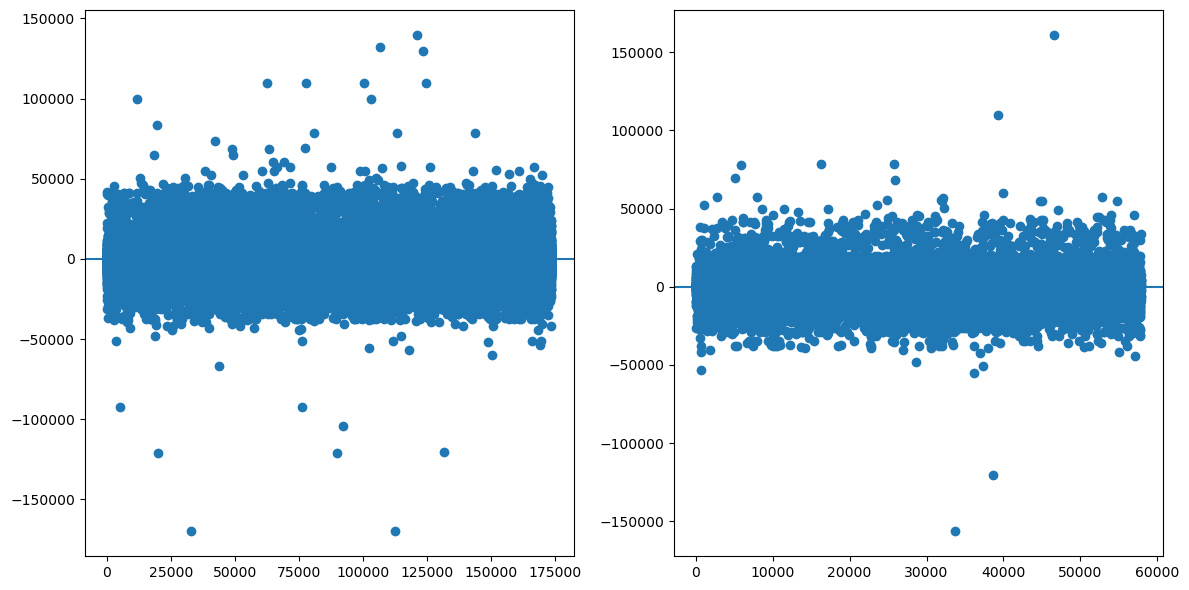

In [47]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(np.arange(len(pred_train)), y_train - pred_train,'o')
plt.axhline(0)
plt.subplot(1,2,2)
plt.plot(np.arange(len(pred_test)), y_test - pred_test,'o')
plt.axhline(0)
plt.tight_layout()

In [49]:
#Linear Regression
# Selecting the features and creating train test split
y = df["Average Benefit Cost"]
X = df[['Annual_sal','Q1 Payments','Q2 Payments','Q3 Payments','Q4 Payments']].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [50]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)

3207.4164021306024


In [52]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
ranked_suburbs = coeff_df.sort_values("Coefficient", ascending = False)
print(ranked_suburbs)
#The coefficient suggests that it has a poor coorelation with the target, hence a poor model is expected

             Coefficient
Q1 Payments     0.165847
Q4 Payments     0.053520
Annual_sal      0.032575
Q2 Payments     0.032318
Q3 Payments    -0.036427


In [53]:
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)
print('Root mean Score Training: {}'.format(r2_score(y_train, pred_train)))
print('Root mean Score Testing: {}'.format(r2_score(y_test, pred_test)))

Root mean Score Training: 0.5168500730819602
Root mean Score Testing: 0.520488238666156


In [54]:
#Processing for creating Best Fit Line
new = pd.Series(list(y_test)).values
new_list =[]
for i in range(len(new)):
    new_list.insert(i,new[i])
new_list = [float(q) for q in new_list]
new_list = [round(q) for q in new_list]
pred_test = [float(q) for q in pred_test]
pred_test = [round(q) for q in pred_test]

In [55]:
# Logic for finding the line of best split
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2
    b = numer/denum
    a = ybar - b * xbar
    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))
    return(a,b)

In [56]:
a, b = best_fit(new_list, pred_test)

best fit line:
y = 4680.65 + 0.52x


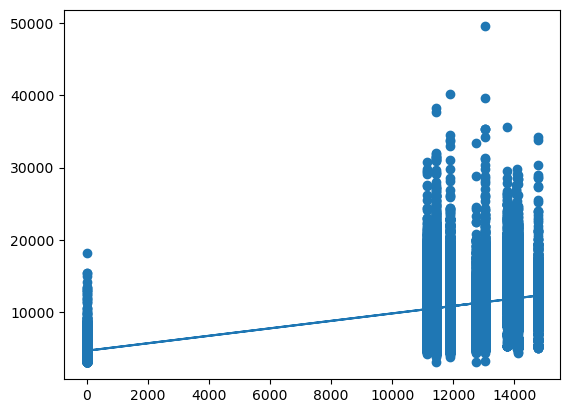

In [57]:
plt.scatter(new_list, pred_test)
yfit = [a + b * xi for xi in new_list]
plt.plot(new_list, yfit)